## Practicing Linear Regression Techniques

Data taken from https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [94]:
# Import Relevant libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
# Enter Proper Directory
# cd '/Users/sauce/Desktop'

In [98]:
# Load Data
data = np.genfromtxt('auto-mpg.txt', usecols = range(8))

In [99]:
# Change to numpy array
data = np.array(data)
data

array([[ 18. ,   8. , 307. , ...,  12. ,  70. ,   1. ],
       [ 15. ,   8. , 350. , ...,  11.5,  70. ,   1. ],
       [ 18. ,   8. , 318. , ...,  11. ,  70. ,   1. ],
       ...,
       [ 32. ,   4. , 135. , ...,  11.6,  82. ,   1. ],
       [ 28. ,   4. , 120. , ...,  18.6,  82. ,   1. ],
       [ 31. ,   4. , 119. , ...,  19.4,  82. ,   1. ]])

In [100]:
# Change to Dataframe
X = pd.DataFrame(data)

In [101]:
X.head()

,0,1,2,3,4,5,6,7
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [103]:
# Add column names
X.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_name', 'origin']

In [105]:
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_name,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [106]:
# Create target variable
Y = X['mpg']

In [107]:
# Drop target from orig
X = X.drop('mpg', axis = 1)

In [108]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_name,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [109]:
# Check for missing values
null_counts = X.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

horsepower    6
dtype: int64

In [110]:
# Replace missing values withe mean
mhp = X["horsepower"].mean()
X["horsepower"] = X["horsepower"].fillna(mhp)

### Practice Simple Linear Regression with 2 Dimensions.

In [71]:
x = X['horsepower']

In [72]:
len(x)

398

In [74]:
xtr = x[:350]

In [75]:
xte = x[350:]

In [77]:
ytr = Y[:350]
yte = Y[:350]

In [80]:
x = np.array(x)
Y = np.array(Y)

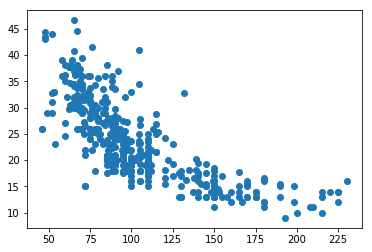

In [84]:
plt.scatter(x, Y)

In [88]:
denom = x.dot(x) - x.mean() * x.sum() 
a = (x.dot(Y) - Y.mean()*x.sum() ) /denom
b = (Y.mean() * x.dot(x) - x.mean() * x.dot(Y) ) / denom

In [89]:
Yhat = a*x + b

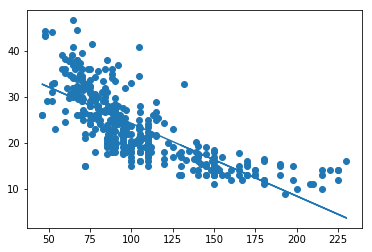

In [90]:
plt.scatter(x, Y)
plt.plot(x, Yhat)

In [92]:
# Compute R-squared

d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)

print(" The r-squared is:", r2)

 The r-squared is: 0.5951152532609463


The r-squared is trash. Let's use more variables.

### Multiple Linear Regression

In [115]:
# Normalize Data

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
scaled = sc_X.fit_transform(X)
scaled = pd.DataFrame(scaled)
scaled.head()

,0,1,2,3,4,5,6
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-0.715145
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-0.715145
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-0.715145
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-0.715145
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-0.715145


In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state = 36)

In [117]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
y_pred = regressor.predict(X_test) 

In [119]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

,Actual,Predicted
116,16.0,12.090367
396,28.0,29.566969
44,13.0,5.633798
371,29.0,29.950254
132,25.0,24.076517
145,32.0,30.332583
279,29.5,32.219194
270,21.1,29.696487
160,17.0,17.075967
139,14.0,10.618046


In [121]:
# Check accuracy with mean squared error

from sklearn import metrics  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 9.777459248493415


In [123]:
# Try Lasso Regression
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [124]:
y_pred2 = reg.predict(X_test) 

In [125]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2}) 

,Actual,Predicted
116,16.0,11.939274
396,28.0,29.653729
44,13.0,5.286552
371,29.0,29.995272
132,25.0,24.076244
145,32.0,30.114854
279,29.5,31.934002
270,21.1,29.219558
160,17.0,17.001078
139,14.0,10.885678


In [126]:
# Check mean squared error

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))


Mean Squared Error: 9.638071919120245


Slight improvement.